# Segmentation
The objective of this assignment is to give you experience with segmentation.
This project is done by a group students (Baron Wilton, Kaavash Bahl, Maghana Harish, Shiyue Ma, Shiyu Qian) at Duke's Fuqua School of Business MQM Program Market Intelligence Course

# Background

Jae’s, a local fast casual restaurant (FCR) with one location on Ninth Street in Durham, is wanting to open a second location in the Triangle area.
Jae’s has partnered with apartment communities in the area, and with Duke University. It has included coupons in Duke’s athletic programs. This allowed it to build brand recognition with students, faculty and staff. The main focus however, has been with local residents and those working in the vicinity.
Jae’s prepared two surveys—one for current customers and one for non-customers. These surveys were administered online using Qualtrics.
Instructions: Use the data from both the customer and non-customer surveys to come up with a recommendation for Jae’s

In [1]:
# import libraries
import pandas as pd
customer_survey = pd.read_csv("CustomerSurvey.tsv", sep ='\t', header=1)

In [2]:
# pull out the column descriptions
descriptions = customer_survey.loc[0,]
descriptions

obs id                                                Observation Identifier
num eat out                Actual number of times per week that responden...
Jaes most freq             Question asked for the name of the respondent'...
sec most freq              Question asked for the name of the respondent'...
ImpConv                    How important is convenience to you in your se...
Imp Menu Variety           How important is menu variety to you in your s...
Imp Value                  How important is value to you in your selectio...
Imp healthy options        How important are healthy options to you in yo...
Imp taste                  How important is taste of the food to you in y...
Imp friendly staff         How important is the friendliness of the staff...
Imp ambiance               How important is the ambiance of the restauran...
num jaes last month        Actual number of times per month that responde...
Compare covenience         How well does Jae's compare to competitors on ...

In [3]:
# remove descriptions for clean data
df = customer_survey.drop(0)
#df.dtypes

# turn the data into numbers and non-responses into NaN
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

df = df[df.applymap(isnumber)]
df = df.apply(pd.to_numeric)
df = df.dropna()
df.index = range(len(df.index)) # reindex after dropping the rows with NaN
df

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,...,Compare taste,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12
0,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,...,5.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,...,6.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0
2,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,...,5.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
3,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,...,4.0,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0
4,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0
185,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0
186,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0
187,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0


In [31]:
df.describe()

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,Imp ambiance,num jaes last month,Compare covenience,Compare menu variety,Compare value,Compare healthy options,Compare taste,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,375.761905,2.899471,0.370370,0.259259,2.809524,2.629630,2.931217,2.433862,2.899471,2.587302,2.656085,2.804233,3.465608,2.952381,3.248677,2.449735,3.084656,2.814815,2.650794,1.333333,2.460317,2.137566,2.005291,0.306878,0.185185,0.037037
std,60.147438,1.420013,0.484186,0.439392,1.244441,1.052035,1.203067,1.726550,1.693369,1.271223,1.217439,2.175488,1.467786,1.168222,1.223250,1.736303,1.808146,1.618573,1.222468,0.472657,0.695550,0.995798,0.695711,0.653147,0.486622,0.215623
min,268.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,326.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,375.000000,3.000000,0.000000,0.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,3.000000,4.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000
75%,426.000000,4.000000,1.000000,1.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,5.000000,5.000000,4.000000,4.000000,3.000000,5.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
max,482.000000,7.000000,1.000000,1.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,5.000000,7.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000,2.000000,4.000000,4.000000,3.000000,2.000000,3.000000,2.000000


In [4]:
# What is the variance of each column?  This might be useful in determining which columns to consider in your analysis; 
# e.g., threshold to only use columns above a certain variance.
df.var()

obs id                     3617.714286
num eat out                   2.016436
Jaes most freq                0.234437
sec most freq                 0.193065
ImpConv                       1.548632
Imp Menu Variety              1.106777
Imp Value                     1.447371
Imp healthy options           2.980975
Imp taste                     2.867500
Imp friendly staff            1.616008
Imp ambiance                  1.482157
num jaes last month           4.732748
Compare covenience            2.154396
Compare menu variety          1.364742
Compare value                 1.496341
Compare healthy options       3.014747
Compare taste                 3.269391
Compare friendly staff        2.619779
Compare ambiance              1.494428
gender                        0.223404
age                           0.483789
income                        0.991613
hhld type                     0.484014
kids under 5                  0.426601
kids 5-12                     0.236801
kids over 12             

In [5]:
# This is an example of one way to pull out the columns you're interesed in.  
# (There are other good ways too, but this is easy to read.)
X = df.loc[:,['num eat out', 'Compare covenience', 'Compare ambiance']]
X

,num eat out,Compare covenience,Compare ambiance
0,4,5.0,2.0
1,4,4.0,2.0
2,2,3.0,4.0
3,2,2.0,5.0
4,2,1.0,3.0
...,...,...,...
184,3,3.0,1.0
185,3,4.0,1.0
186,2,5.0,2.0
187,1,6.0,2.0


In [6]:
corr = df.iloc[:,1:].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,Imp ambiance,num jaes last month,Compare covenience,Compare menu variety,Compare value,Compare healthy options,Compare taste,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12
num eat out,1,-0.29,0.45,0.26,0.2,0.24,-0.39,0.29,-0.43,-0.38,-0.0081,0.37,-0.016,0.051,-0.38,0.16,-0.41,-0.39,0.45,-0.23,-0.32,-0.34,-0.33,-0.17,-0.023
Jaes most freq,-0.29,1,-0.45,-0.22,-0.16,-0.24,0.61,0.0067,0.47,0.49,0.41,-0.21,0.21,0.1,0.6,0.17,0.54,0.49,-0.29,0.41,0.5,0.44,0.51,0.32,0.021
sec most freq,0.45,-0.45,1,0.47,0.46,0.45,-0.31,0.54,-0.32,-0.33,0.21,0.31,0.26,0.29,-0.29,0.41,-0.31,-0.34,0.53,-0.38,-0.46,-0.3,-0.2,-0.18,-0.1
ImpConv,0.26,-0.22,0.47,1,0.73,0.67,-0.083,0.62,0.024,-0.061,0.29,0.36,0.56,0.56,-0.064,0.57,-0.049,-0.068,0.43,-0.26,-0.34,-0.14,-0.026,-0.1,-0.033
Imp Menu Variety,0.2,-0.16,0.46,0.73,1,0.72,0.06,0.73,0.12,0.037,0.34,0.32,0.83,0.64,0.071,0.71,0.031,0.031,0.43,-0.19,-0.34,-0.034,0.058,-0.13,-0.0096
Imp Value,0.24,-0.24,0.45,0.67,0.72,1,-0.13,0.6,0.054,-0.093,0.22,0.3,0.52,0.85,-0.11,0.54,-0.042,-0.1,0.41,-0.34,-0.44,-0.18,-0.061,-0.17,-0.031
Imp healthy options,-0.39,0.61,-0.31,-0.083,0.06,-0.13,1,0.2,0.8,0.77,0.61,-0.31,0.51,0.31,0.98,0.44,0.82,0.78,-0.27,0.51,0.64,0.7,0.77,0.35,0.099
Imp taste,0.29,0.0067,0.54,0.62,0.73,0.6,0.2,1,0.19,0.22,0.75,0.15,0.79,0.71,0.21,0.92,0.24,0.21,0.46,-0.13,-0.17,0.11,0.1,0.12,-0.019
Imp friendly staff,-0.43,0.47,-0.32,0.024,0.12,0.054,0.8,0.19,1,0.78,0.5,-0.3,0.48,0.41,0.8,0.4,0.93,0.78,-0.34,0.37,0.56,0.58,0.67,0.3,0.11
Imp ambiance,-0.38,0.49,-0.33,-0.061,0.037,-0.093,0.77,0.22,0.78,1,0.57,-0.37,0.48,0.34,0.77,0.34,0.86,1,-0.27,0.49,0.71,0.62,0.55,0.45,0.13


### Now, using the Session 6 activity as as guide, segment the customers and answer all the questions in the write-up requirements.

In [7]:
# import libraries
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis

In [8]:
X = df.iloc[:,4:10]
X

,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff
0,5.0,4.0,5.0,1.0,5.0,2.0
1,4.0,4.0,4.0,2.0,6.0,2.0
2,3.0,3.0,3.0,6.0,3.0,5.0
3,2.0,2.0,2.0,5.0,4.0,4.0
4,3.0,2.0,3.0,2.0,2.0,3.0
...,...,...,...,...,...,...
184,1.0,2.0,2.0,1.0,1.0,1.0
185,1.0,1.0,1.0,1.0,1.0,1.0
186,1.0,3.0,3.0,2.0,2.0,2.0
187,3.0,3.0,3.0,2.0,3.0,3.0


Approach 1 : K-means

In [9]:
# Choose a K
# Loop over several values of K
objective = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    objective.append(kmeans.inertia_)

kmeans_objectives = pd.DataFrame({'K': range(1,10), 'objective': objective})

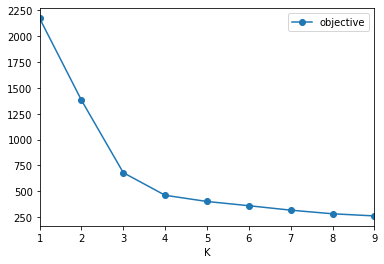

In [10]:
# After plot the results, we see 3 is the best K
import matplotlib.pyplot as plt
kmeans_objectives.plot(x='K', y='objective',style = "-o")

In [37]:
# Fit K-means
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [38]:
# Define a helper function to sort attributes
def sorted_attr(idx, cluster_centers, column_names):
    print("*** Sorted attributes for %d ***" % idx)
    for i in sorted(range(len(column_names)), key = lambda i: -cluster_centers[idx, i]):
        print(column_names[i], cluster_centers[idx, i])

In [39]:
# Look at the top attributes for each cluster
sorted_attr(0, kmeans.cluster_centers_, X.columns)
# Cluster 0 : Value
sorted_attr(1, kmeans.cluster_centers_, X.columns)
# Cluster 1 : Taste
sorted_attr(2, kmeans.cluster_centers_, X.columns)
# Cluster 2 : Health

*** Sorted attributes for 0 ***
Imp Value 2.500000000000001
ImpConv 2.2870370370370363
Imp Menu Variety 2.157407407407406
Imp friendly staff 2.101851851851851
Imp taste 1.6851851851851853
Imp healthy options 1.6481481481481484
*** Sorted attributes for 1 ***
Imp taste 5.51219512195122
Imp Value 4.487804878048781
ImpConv 4.48780487804878
Imp Menu Variety 3.9999999999999982
Imp friendly staff 1.9999999999999998
Imp healthy options 1.5121951219512193
*** Sorted attributes for 2 ***
Imp healthy options 5.500000000000002
Imp friendly staff 4.5
Imp taste 3.5000000000000004
Imp Value 2.5000000000000004
Imp Menu Variety 2.5
ImpConv 2.4999999999999996


In [40]:
# Append cluster to original customer survey data 
clustered_data = df.join(pd.DataFrame({'cluster': kmeans.labels_}))
clustered_data

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,Imp ambiance,num jaes last month,Compare covenience,Compare menu variety,Compare value,Compare healthy options,Compare taste,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,cluster
0,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,2.0,4.0,5.0,4.0,5.0,1.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1
1,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,2.0,5.0,4.0,4.0,4.0,2.0,6.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,1
2,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,4.0,5.0,3.0,4.0,4.0,6.0,5.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,2
3,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,5.0,7.0,2.0,4.0,4.0,5.0,4.0,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,2
4,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0
185,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,0
186,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,5.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0
187,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,6.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0


In [41]:
clustered_data["obs id"].groupby(clustered_data["cluster"]).count()

cluster
0    108
1     41
2     40
Name: obs id, dtype: int64

In [42]:
pd.crosstab(clustered_data["Jaes most freq"], clustered_data.cluster)
# Target Cluster 2

cluster,0,1,2
Jaes most freq,,,
0,83,36,0
1,25,5,40


In [43]:
pd.crosstab(clustered_data["sec most freq"], clustered_data.cluster)

cluster,0,1,2
sec most freq,,,
0,95,5,40
1,13,36,0


In [44]:
pd.set_option('display.max_columns', 100)

In [45]:
clustered_data.groupby("cluster").mean()
# Although Cluster 2 has the lowest num eat out they are loyal to Jaes. 
# They are mostly Female, aged from 31 to 40, Middle to high income lever ($50,000+), Family with 1-2 kids under 5

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,Imp ambiance,num jaes last month,Compare covenience,Compare menu variety,Compare value,Compare healthy options,Compare taste,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,377.157407,2.796296,0.231481,0.120370,2.287037,2.157407,2.500000,1.648148,1.685185,2.101852,2.222222,1.055556,3.416667,2.157407,2.500000,1.648148,1.685185,2.101852,2.222222,1.203704,2.435185,2.037037,1.787037,0.037037,0.083333,0.037037
1,378.341463,4.219512,0.121951,0.878049,4.487805,4.000000,4.487805,1.512195,5.512195,2.000000,2.000000,4.512195,4.536585,4.024390,4.487805,1.585366,5.390244,2.073171,1.975610,1.926829,1.902439,1.073171,1.658537,0.048780,0.048780,0.000000
2,369.350000,1.825000,1.000000,0.000000,2.500000,2.500000,2.500000,5.500000,3.500000,4.500000,4.500000,5.775000,2.500000,4.000000,4.000000,5.500000,4.500000,5.500000,4.500000,1.075000,3.100000,3.500000,2.950000,1.300000,0.600000,0.075000


In [46]:
pd.crosstab(clustered_data["gender"], clustered_data.cluster)

cluster,0,1,2
gender,,,
1.0,86,3,37
2.0,22,38,3


In [47]:
pd.crosstab(clustered_data["age"], clustered_data.cluster)

cluster,0,1,2
age,,,
1.0,9,4,0
2.0,48,37,0
3.0,46,0,36
4.0,5,0,4


In [49]:
pd.crosstab(clustered_data["income"], clustered_data.cluster)

cluster,0,1,2
income,,,
1.0,24,38,0
2.0,56,3,0
3.0,28,0,20
4.0,0,0,20


In [50]:
pd.crosstab(clustered_data["hhld type"], clustered_data.cluster)

cluster,0,1,2
hhld type,,,
1.0,28,17,0
2.0,75,21,2
3.0,5,3,38


In [51]:
pd.crosstab(clustered_data["kids under 5"], clustered_data.cluster)

cluster,0,1,2
kids under 5,,,
0.0,106,39,6
1.0,0,2,16
2.0,2,0,18


*** Approach 2 : K-means Based on Factor Analysis

In [20]:
# Scree plot
from sklearn.decomposition import PCA
pca = PCA().fit(X)
scree_data = pd.DataFrame({'eigenvalues': pca.explained_variance_,
                           'component': range(len(pca.explained_variance_))})

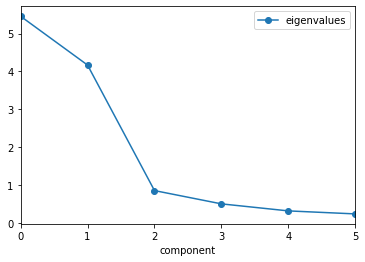

In [21]:
scree_data.plot(x='component', y='eigenvalues',style = "-o")

In [22]:
# Run factor analysis on our attributes
transformer = FactorAnalysis(n_components=2, random_state=0)
X_transformed = transformer.fit_transform(X)
transformer.components_

array([[-0.08268913,  0.08194717, -0.13658204,  1.69630755,  0.35816322,
         1.03459607],
       [ 1.01186889,  0.95439422,  0.97061713, -0.03474869,  1.31725571,
         0.10737629]])

In [23]:
# What's important to each factor?
sorted_attr(0, transformer.components_, X.columns)
sorted_attr(1, transformer.components_, X.columns)

*** Sorted attributes for 0 ***
Imp healthy options 1.6963075488247203
Imp friendly staff 1.0345960710635684
Imp taste 0.3581632165880525
Imp Menu Variety 0.08194717361257545
ImpConv -0.08268913177737712
Imp Value -0.13658204207617194
*** Sorted attributes for 1 ***
Imp taste 1.3172557075657025
ImpConv 1.0118688919846792
Imp Value 0.9706171278735592
Imp Menu Variety 0.9543942174300221
Imp friendly staff 0.1073762939897505
Imp healthy options -0.03474869438398717


In [24]:
# Choose a K
# Loop over several values of K
objective = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_transformed)
    objective.append(kmeans.inertia_)

kmeans_objectives = pd.DataFrame({'K': range(1,10), 'objective': objective})

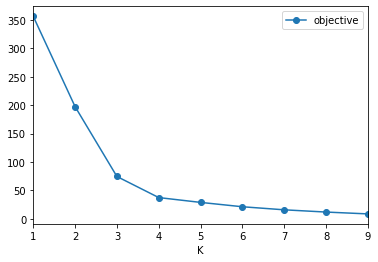

In [25]:
# After plot the results, we see 3 is the best K
import matplotlib.pyplot as plt
kmeans_objectives.plot(x='K', y='objective',style = "-o")

In [26]:
# Fit K-means
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_transformed)
# Append cluster to original customer survey data 
clustered_data = df.join(pd.DataFrame({'cluster': kmeans.labels_}))
clustered_data

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,Imp ambiance,num jaes last month,Compare covenience,Compare menu variety,Compare value,Compare healthy options,Compare taste,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,cluster
0,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,2.0,4.0,5.0,4.0,5.0,1.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1
1,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,2.0,5.0,4.0,4.0,4.0,2.0,6.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,1
2,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,4.0,5.0,3.0,4.0,4.0,6.0,5.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,0
3,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,5.0,7.0,2.0,4.0,4.0,5.0,4.0,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,0
4,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,2
185,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,2
186,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,5.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2
187,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,6.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1


In [27]:
clustered_data["obs id"].groupby(clustered_data["cluster"]).count()

cluster
0    41
1    65
2    83
Name: obs id, dtype: int64

In [28]:
pd.crosstab(clustered_data["Jaes most freq"], clustered_data.cluster)

cluster,0,1,2
Jaes most freq,,,
0,1,57,61
1,40,8,22


In [29]:
pd.crosstab(clustered_data["sec most freq"], clustered_data.cluster)

cluster,0,1,2
sec most freq,,,
0,41,27,72
1,0,38,11


In [30]:
clustered_data.groupby("cluster").mean()

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,Imp ambiance,num jaes last month,Compare covenience,Compare menu variety,Compare value,Compare healthy options,Compare taste,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,371.463415,1.804878,0.975610,0.000000,2.512195,2.536585,2.487805,5.463415,3.463415,4.414634,4.487805,5.658537,2.487805,4.000000,3.951220,5.463415,4.439024,5.390244,4.487805,1.097561,3.121951,3.463415,2.926829,1.268293,0.585366,0.073171
1,376.523077,3.615385,0.123077,0.584615,4.076923,3.723077,4.015385,1.707692,4.384615,2.307692,2.261538,3.261538,4.246154,3.738462,4.015385,1.753846,4.307692,2.353846,2.246154,1.646154,2.061538,1.461538,1.707692,0.030769,0.061538,0.015385
2,377.289157,2.879518,0.265060,0.132530,1.963855,1.819277,2.301205,1.506024,1.457831,1.903614,2.060241,1.036145,3.337349,1.819277,2.301205,1.506024,1.457831,1.903614,2.060241,1.204819,2.445783,2.012048,1.783133,0.048193,0.084337,0.036145


### At some point, you will also need to use the noncustomer survey data...
Note: the simplest approach in this phase of your analysis will be to use crosstabs on the noncustomer survey data.

In [93]:
noncustomer_survey = pd.read_csv("NoncustomerSurvey.tsv", sep ='\t', header=1)

In [94]:
# pull out the column descriptions
noncustomer_descriptions = noncustomer_survey.loc[0,]
noncustomer_descriptions

obs                                                          Observation Identifier
#times/wk eat lunch/dinner out    Actual number of times per week that responden...
FCR most freq                     Question asked for the name of the respondent'...
FCR sec most freq                 Question asked for the name of the respondent'...
Imp convenient                    How important is convenience to you in your se...
Imp menu variety                  How important is menu variety to you in your s...
Imp value                         How important is value to you in your selectio...
Imp healty options                How important are healthy options to you in yo...
Imp taste                         How important is taste of the food to you in y...
Imp friendly staff                How important is the friendliness of the staff...
Imp ambience                      How important is the ambiance of the restauran...
gender                                                   Gender:  1= Female,

In [101]:
# remove descriptions for clean data
noncustomer_df = noncustomer_survey.drop(0)

# turn the data into numbers and non-responses into NaN
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

noncustomer_df = noncustomer_df[noncustomer_df.applymap(isnumber)]
noncustomer_df = noncustomer_df.apply(pd.to_numeric)
noncustomer_df = noncustomer_df.drop(noncustomer_df.columns[19:], axis = 1)
noncustomer_df

,obs,#times/wk eat lunch/dinner out,FCR most freq,FCR sec most freq,Imp convenient,Imp menu variety,Imp value,Imp healty options,Imp taste,Imp friendly staff,Imp ambience,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,area
1,5,5.0,0.0,0.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1
2,12,3.0,0.0,0.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1
3,17,6.0,1.0,0.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1
4,29,1.0,0.0,0.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2
5,105,1.0,1.0,1.0,3,2.0,2,5.0,4,5.0,3,1.0,3.0,3.0,3.0,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,250,1.0,NaN,NaN,1,3.0,1,5.0,1,5.0,3,2.0,3.0,1.0,1.0,0.0,0.0,0.0,2
177,255,2.0,NaN,NaN,2,2.0,1,2.0,1,2.0,2,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1
178,258,1.0,NaN,NaN,1,1.0,1,1.0,1,1.0,1,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2
179,264,5.0,NaN,NaN,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1


In [102]:
noncustomer_df.describe()

,obs,#times/wk eat lunch/dinner out,FCR most freq,FCR sec most freq,Imp convenient,Imp menu variety,Imp value,Imp healty options,Imp taste,Imp friendly staff,Imp ambience,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,area
count,180.000000,176.000000,139.000000,129.000000,180.000000,179.000000,180.000000,179.000000,180.000000,179.000000,180.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,176.000000,180.000000
mean,137.116667,2.500000,0.568345,0.534884,2.777778,2.547486,2.761111,2.944134,3.261111,2.754190,2.566667,1.389831,2.305085,2.022599,2.045198,0.406780,0.282486,0.232955,1.500000
std,73.721981,1.863944,0.497098,0.500726,1.296991,1.152297,1.511091,2.021571,1.738052,1.527251,1.337470,0.489095,0.810182,1.071081,0.858244,0.709961,0.475990,0.611550,0.501395
min,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,77.750000,1.000000,0.000000,0.000000,2.000000,2.000000,1.750000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,137.500000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.500000
75%,198.250000,4.000000,1.000000,1.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,2.000000
max,266.000000,7.000000,1.000000,1.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,4.000000,4.000000,3.000000,2.000000,2.000000,4.000000,2.000000


In [104]:
noncustomer_df.groupby("area").mean()

,obs,#times/wk eat lunch/dinner out,FCR most freq,FCR sec most freq,Imp convenient,Imp menu variety,Imp value,Imp healty options,Imp taste,Imp friendly staff,Imp ambience,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12
area,,,,,,,,,,,,,,,,,,
1,132.422222,3.5,0.535211,0.544118,3.411111,2.943820,3.455556,1.494382,3.666667,1.786517,1.844444,1.693182,2.011364,1.375000,1.477273,0.079545,0.068182,0.090909
2,141.811111,1.5,0.602941,0.524590,2.144444,2.155556,2.066667,4.377778,2.855556,3.711111,3.288889,1.089888,2.595506,2.662921,2.606742,0.730337,0.494382,0.375000
